In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df =  pd.read_csv("sample_data/california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# Tipos de Gráficos

Existen varios tipos de Gráficos; hoy veremos los principales.

Lo ideal es escoger aquella que se pueda entender en menos de 10 segundos.

**Una buena gráfica es como un chiste: si la tengo que explicar, no sirve.**

## Histogramas

Permiten darnos cuenta de dónde se concentran los datos de **una** sola variable.

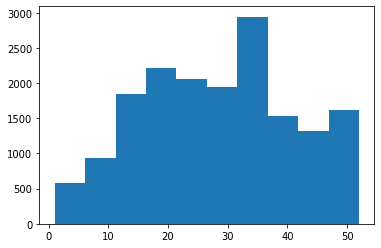

In [ ]:
plt.hist(df.housing_median_age)
plt.show()

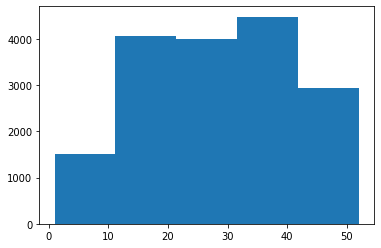

In [ ]:
# Por default, Python crea 10 grupos. Peeeero, este número se puede modificar.
plt.hist(df.housing_median_age, bins=5)
plt.show()

No necesitan que hagamos cálculos! Son muy prácticos especialmente al principio del análisis, ya que podemos conocer las distribuciones

En el eje X se encuentran los intervalos. En el eje Y, qué tan frecuente es que un valor esté en ese intervalo.

## Dispersión/Puntos (Scatterplot)

Son el equivalente de Histogramas, pero para **parejas** de variables. Me dan una observación rápida de mis datos.

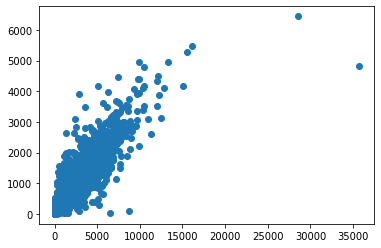

In [ ]:
plt.scatter(df["population"],	df["total_bedrooms"])
plt.show()

¡Los puntos están más o menos sobre una misma línea! Eso significa que existe una alta correlación entre ambos valores (y puedo comprobarlo calculando alguna medida).

Recordatorio: ¡correlación no implica causalidad!

In [ ]:
df[["population", "total_bedrooms"]].corr()

,population,total_bedrooms
population,1.000000,0.881169
total_bedrooms,0.881169,1.000000


Nota: ese tipo de gráficos son muy valiosos para detectar puntos con valores atípicos; estos pudieran ser debido a un error de medición, o ser valores reales, pero poco comunes.

Es parte del analista el decidir qué hacer con ellos. ¿hago como que no existen, y los borro? ¿Los reemplazo por algún valor que haga más sentido?

Todo depende del tipo de problema.

(Y por eso, es muy importante entender primero el problema, antes de aventarme a analizarlo).

## Gráfico de Barras (columnas)

Especialmente útiles cuando queremos comparar cantidades en términos absolutos. Sobretodo, a través de varios grupos o categorías.

In [24]:
df2=pd.read_csv("https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv")
df2.head(3)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [36]:
legendarios=df2.groupby("Legendary").mean()
legendarios

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Legendary,,,,,,,,,
False,353.315646,417.213605,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782,3.284354
True,470.215385,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231


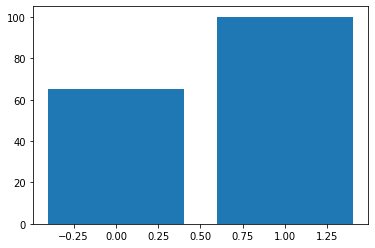

In [37]:
# Nota: si usé un groupby, debo usar .index como primer argumento.
plt.bar(legendarios.index, legendarios["Speed"])
plt.show()

¡De esta forma, es más fácil saber qué tanto más rápido son, en promedio, los Pokémon legendarios!

Lástima que la utilidad de estas gráficas se pierde un poco cuando uso muchas categorías...


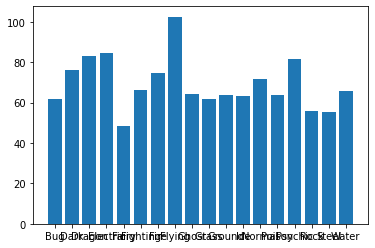

In [38]:
tipo1=df2.groupby("Type 1").mean()
plt.bar(tipo1.index, tipo1["Speed"])
plt.show()

Podría intentar girar los textos, para que se muestren de manera vertical.

*Spoiler Alert: si se puede, pero rara vez es buena idea *

Recuerda:
Lo ideal que las gráficas se puedan entender en menos de 10 segundos.

¿Qué podría convenirme?

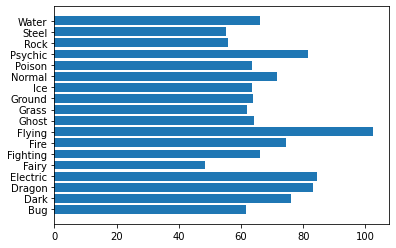

In [39]:
plt.barh(tipo1.index, tipo1["Speed"])
plt.show()

¡Ah! Mucho más agradable a la vista...

## Gráficas de Líneas.

Algunas veces, tendremos datos que corresponden van relacionados con alguna unidad de tiempo.

Ahí, la típica de gráficas de Barras puede ser útil para ver altos y bajos, pero puesto que los datos van ordenados, puedo hacer una gráfica de líneas para analizar tendencias.

In [43]:
generaciones = df2[df2["Type 1"]=="Bug"].groupby("Generation").mean()
generaciones

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Generation,,,,,,,,,
1,46.928571,366.428571,56.785714,76.428571,60.357143,46.428571,59.642857,66.785714,False
2,194.416667,428.750000,59.583333,85.416667,93.750000,47.916667,86.666667,55.416667,False
3,283.500000,318.833333,49.833333,55.833333,54.083333,48.333333,51.166667,59.583333,False
4,416.800000,373.100000,59.000000,62.600000,70.200000,63.600000,67.200000,50.500000,False
5,584.722222,416.111111,59.111111,77.611111,78.277778,62.888889,66.944444,71.277778,False
6,665.000000,274.666667,54.333333,36.333333,50.000000,48.000000,35.000000,51.000000,False


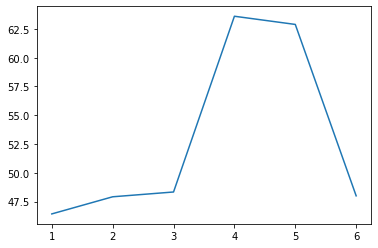

In [45]:
plt.plot(generaciones.index, generaciones["Sp. Atk"])
plt.show()

## Gráfico Circular (de Pastel).
.

.

.

.

.

**Jamás** realicen gráficos circulares.

.

El ser humano es pésimo para distinguir ángulos. Eso sí, somos buenos para distinguir qué elemento es más ancho, largo, etc, o qué color es más oscuro. Es por eso que siempre tendremos mejores alternativas.
